## AUTÓMATA CELULAR
---

Un autómata celular consiste en una cuadrícula regular de celdas, donde cada una representa un organismo o célula y que se encuenta en un número finito de estados, en este caso solo 2 estados posibles: viva o muerta, que se representan mediante un sistema binario de ceros y unos. Cada organismo sigue unas “reglas genéticas” preestablecidas, que controlan los nacimientos, muertes y supervivencia de cada uno dependiendo de su vencidad. 

El talero puede tener cualquier cantidad finita de dimensiones, y según el estado inicial, se crea una nueva generación. Normalmente, las reglas genéticas para actualizar el estado de las células son las mismas para cada célula y no cambian con el tiempo. 

---
## Autómata celular de 1-Dimensión

<img src="rule_30_1D.png">
_Blanca: Muerta, Negra: Vive_

El destino de cada célula sólo depende de la célula que se encuentra a su izquierda y a su derecha. 
Dado que hay 2 posibles estados y tres celdas a evaluar, entonces hay $2 × 2 × 2 = 2 ^ 3 = 8$ estados binarios posibles que pueden encontrarse en un vecindario, y por lo tanto hay un total de $2 ^ 8 = 256$ autómatas celulares elementales que se pueden contruir (también llamados _Reglas_).

In [1]:
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline              

In [2]:
def matriz_zeros(n,m):
    '''Devuelve una matriz llena de ceros de tamaño n x m'''
    N = []
    # Creamos un bucle para llenar la matriz
    for i in range(0,n):         
        a = []                    
        for j in range(0,m):     
            a.append(0)           
        N.append(a)               
        
    return N


def Elementary_Cellular_Automaton(M, result):
    """Argumentos: Matriz con 1ra generación y el resultado de una regla específica
       Retorna una Matriz de dos dimensiones: Espacio y tiempo,
       donde se puede observar la evolución de las generaciones del 
       Automata celular"""
    
    rules = [[1,1,1],[1,1,0],[1,0,1],[1,0,0],[0,1,1],[0,1,0],[0,0,1],[0,0,0]]
    
    for i in range(1,len(M)-1):              #Filas de la matriz
        for j in range(0,len(M[0])-1):       #Columnas de la matriz
            
            for k in range(0,len(rules)-1):  #Recorre las reglas para ver si el vecindario coincide con el encontrado
                
                #Evalua la generacion anterior: i-1.
                #Va desde j-1 a j+1, es decir, las 3 células alrededor de la célula en cuestión 
                if M[i-1][j-1:j+2] == rules[k]:  #Si conincide con una de las reglas: 
                    M[i][j] = result[k]          #Agrega el resultado, pues ambos indices coninciden  
    
    return M


def initial_Condition_1D(n,random):
    """Devuelve la Matriz con la 1ra generación de células, sea aleatoria o no"""
    M =  matriz_zeros(n,n) #Tablero vacío de dimension "n" en espacio y tiempo
    if random == True: 
        #Agrego los números aleatorios generados a la 1ra fila de la matriz (1ra generación)
        for i in range(int(len(M[0]))):  M[0][i] = np.random.randint(2) #Números aleatorios: 0 y 1 
            
    else: M[0][int(len(M[0])/2)]=1  #Inciar con una célula viva justo en el centro del tablero
        
    return M
 
    
def rules_1D(rule):
    """Función que busca entre distintas reglas"""
    if rule == "30": result = [0,0,0,1,1,1,1,0]
    if rule == "90": result = [0,1,0,1,1,0,1,0]
    if rule == "205": result = [1,1,0,0,1,1,0,1]
    
    return result

def graph_1D(rule, n, random):
    FirstGen = initial_Condition_1D(n, random)          #Ingreso la condicion inicial 
    Result = rules_1D(rule)                              #Ingreso la regla
    M = Elementary_Cellular_Automaton(FirstGen, Result)  #Ingreso el proceso
    
    #Grafica la matriz como un mapa de color 
    plt.matshow(M,cmap=plt.cm.gray_r)
    plt.xlabel("Dimensión Espacial")
    plt.ylabel("Dimensión Temporal")

## Regla 30

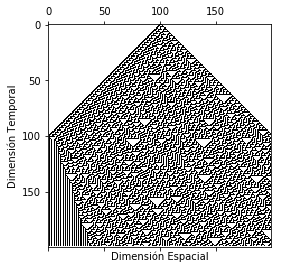

In [3]:
graph_1D("30", 200, False)

## Regla 90


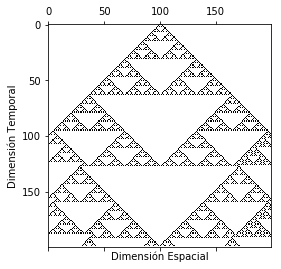

In [48]:
graph_1D("90", 200, False)

## Regla 205

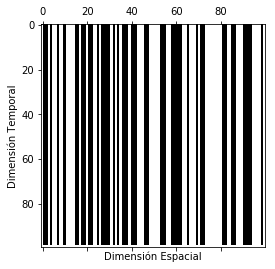

In [46]:
graph_1D("205", 100, True)

---
## Autómata celular  2-D: _El juego de la vida de Conway_
Consta de un conjunto de matrices de 2 dimensiones espaciales. En este caso existen 2 posibles estados y como mínimo ( dependiendo del la vecindad de Moore) ocho celdas a evaluar. Por lo tanto, hay $ 2 ^ 8 = {256}$ estados binarios posibles que pueden encontrarse en un vecindario, y por lo tanto hay un total de $2 ^ {256} $ cantidad de reglas genéticas, así que para elegirlas se ha establecido que estas deben ser tales que el comportamiento de la población sea impredecible, así:
* No debe haber un patrón inicial, para el cual exista una prueba simple, de que la población puede crecer sin límites.
* Debería haber patrones iniciales que aparentemente crecen sin límites.
* Debería haber patrones iniciales simples que crecen y cambian durante un período de tiempo considerable antes de terminar de las siguientes formas:
    -     Desvanecerse por completo (de hacinamiento o dispersión).
    -     Establecerse en una configuración estable.
    -     Ingresar una fase oscilante en la que repiten un ciclo interminable de dos o más períodos.

#### _Vecindad de Moore_

<img src="moore.png"  width="300" >

A pesar de que hay muchas reglas posibles, las reglas propuestas por **John Horton Conway** en 1970 son las que han presentado tener un comportamiento complejo (entre estables, de crecimiento, caóticos,etc). Con una **vecindad de Moore $r=1$,** las relgas son:
* **Supervivencia:** Cada organismo con dos o tres vecinos sobrevive para la próxima generación.
* **Muerte:** Cada organismo con cuatro o más vecinos muere por sobrepoblación. Cada organismo con un vecino o ninguno muere de aislamiento.
* **Nacimiento:** Un organismo nace en la siguiente generación si es una celda vacía adyacente a exactamente tres vecinos.


In [2]:
def new_generation(board):                 
    """Retorna una Matriz con la nueva generación dada una generación anterior"""
    board2 = np.zeros([int(len(board)),int(len(board[0]))])
    for i in range(1,len(board)-1):        #filas de la Matriz: No bordes
        for j in range(1,len(board[0])-1): #columnas de la Matriz: No bordes 
            n=0                            #Inicializa la cantidad de vecinos por célula
            
            for k in range(-1,2): #k = [-1,0,1]. Centrado en una célula, busca en la fila superior, media y abajo
                for h in range(-1,2): #Centrado en una célula, recorre cada posición en la fila
                    if (board[i+k][j+h] == 1) and (k!=0 or h!=0): 
                        n+=1    #Si la célula vecina esta viva pero no es ella misma --> Cuenta un vecino
                        
            if board[i][j] == 1:                      #Si la célula esta viva:
                #if n<2 or n>3: board2[i][j] = 0       #Muere: por soledad (n de 0-1) o sobrepoblacion (n de 4-8)
                if n == 2 or n == 3: board2[i][j] = 1 #Sobrevive
                    
            if board[i][j] == 0:            #Si la célula esta muerta:
                if n == 3: board2[i][j] = 1 #Nace 
                #if n != 3: board2[i][j] = 0 #Nada sucede 
    
    return board2 #Forma un tablero con la nueva generación 
  

In [3]:
#Catálogo de Figuras: 

def Random_board(n):
    """Genera un patrón aleatorio"""
    board = np.zeros([n,n])
    for i in range(n):  
        for j in range(n): board[i][j] = np.random.randint(2) #Números aleatorios entre 0 y 1 
    return board

def Blinker(n):
    board = np.zeros([n,n])
    board[3][3:6] = 1
    return board

def PufferFish(n):
    board = np.zeros([n,n])
    a = int(n/2)
    board[a+3][6:15:8] = 1
    board[a+4][5:8] = board[a+4][13:16] = 1
    board[a+5][4:6] = board[a+5][8:13:4] = board[a+5][15:17] = 1
    board[a+6][6:9] = board[a+6][12:15] = 1
    board[a+8][7:15:6] = 1
    board[a+9][5:9:3] = board[a+9][12:16:3] =  1
    board[a+10][3:10:6] = board[a+10][11:19:6] = 1
    board[a+11][3:5] = board[a+11][9:12:2]= board[a+11][16:18] = 1
    board[a+12][9:12:2] = 1
    board[a+13][6:9:2] = board[a+13][12:15:2] =  1
    board[a+14][7:14:6] = 1 
    return board

def R_Pentomino(n):
    board = np.zeros([n,n])
    a = int(n/3)
    board = np.zeros([n,n])
    board[a+2][a+3:a+5] = board[a+3][a+2:a+4] = board[a+4][a+3] = 1
    return board


def Gosper_glider_gun(n):
    board = np.zeros([n,n])
    a = int(n/4)
    board[2][26]=1
    board[3][24:27:2]=1  
    board[4][14:16]= board[4][22:24]= board[4][36:38]= 1 
    board[5][13:18:4]= board[5][22:24]= board[5][36:38]= 1 
    board[6][2:4] = board[6][12:19:6] = board[6][22:24]=  1
    board[7][2:4] = board[7][12:19:6] = board[7][16:20:3] = board[7][24:27:2] = 1
    board[8][12:19:6] = board[8][26] = 1
    board[9][13:18:4]=  1 
    board[10][14:16]= 1
    return board


def Middleweight_Spaceshipboard(n):
    board= np.zeros([n,n])
    a = int(n/2)
    b = int(n/4)
    board[b+1][a+3:a+5] = 1
    board[b+2][a+2:a+4] = 1
    board[b+2][a+5:a+8] = 1
    board[b+3][a+3:a+8] = 1
    board[b+4][a+4:a+7] = 1
    return board

def Life2(n):
    board= np.zeros([n,n])
    a = int(n/2)
    b = int(n/4)
    c = int(n/2)
    board[b+1][a+3:a+5] = 1
    board[b+2][a+2:a+4] = 1
    board[b+2][a+5:a+8] = 1
    board[b+3][a+3:a+8] = 1
    board[b+4][a+4:a+7] = 1
    board[b+1][10:12] = board[b+2][10:12] = 1
    board[1][3] = board[2][4] = board[3][2:5] = 1
    ###
    board[c+3][6:15:8] = 1
    board[c+4][5:8] = board[c+4][13:16] = 1
    board[c+5][4:6] = board[c+5][8:13:4] = board[a+5][15:17] = 1
    board[c+6][6:9] = board[c+6][12:15] = 1
    board[c+8][7:15:6] = 1
    board[c+9][5:9:3] = board[c+9][12:16:3] =  1
    board[c+10][3:10:6] = board[c+10][11:19:6] = 1
    board[c+11][3:5] = board[c+11][9:12:2]= board[c+11][16:18] = 1
    board[c+12][9:12:2] = 1
    board[c+13][6:9:2] = board[c+13][12:15:2] =  1
    board[c+14][7:14:6] = 1 
    return board

def Life3(n):
    board= np.zeros([n,n])
    a = int(n/2)
    b = int(n/4)
    board[b+1][a+3:a+5] = 1
    board[b+2][a+2:a+4] = 1
    board[b+2][a+5:a+8] = 1
    board[b+3][a+3:a+8] = 1
    board[b+4][a+4:a+7] = 1
    board[b+1][10:12] = board[b+2][10:12] = 1
    board[1][3] = board[2][4] = board[3][2:5] = 1
    return board

In [4]:
#Funciones para definir la condicion inicial y realizar la animación

def init():
    global n 
    global figure 
    im.set_data(initial_condition_2D(figure, n))
    return im,

def animate(i):
    a = im.get_array()
    a = new_generation(a)
    im.set_array(a)
    return im,

In [5]:
#Búsqueda de figuras

def initial_condition_2D(figure, n):
    
    if figure == "Blinker": board = Blinker(n)
    if figure == "PufferFish": board = PufferFish(n)
    if figure == "R_Pentomino": board = R_Pentomino(n)
    if figure == "Gosper_glider_gun": board = Gosper_glider_gun(n)
    if figure == "Middleweight_Spaceshipboard": board = Middleweight_Spaceshipboard(n)
    if figure == "Life2": board = Life2(n)
    if figure == "Life3": board = Life3(n)
    if figure == "Random": board = Random_board(n)
        
    return board

In [6]:
def graph_2D():
    """Crea las características del board o tablero para el juego de la vida"""
    #Mueve la cuadricula un 0.5 para que cada uno de los recuadros represente un lugar en la matriz
    plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true') 
    plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')   
    plt.grid(which='minor') #grid: lo más pequeña posible
    ax.set_xticklabels([])  #Quitar los labels (los números que aparecen por el agregar el Grid)
    ax.set_yticklabels([])

_Pulsars, Beehives, blocks..._

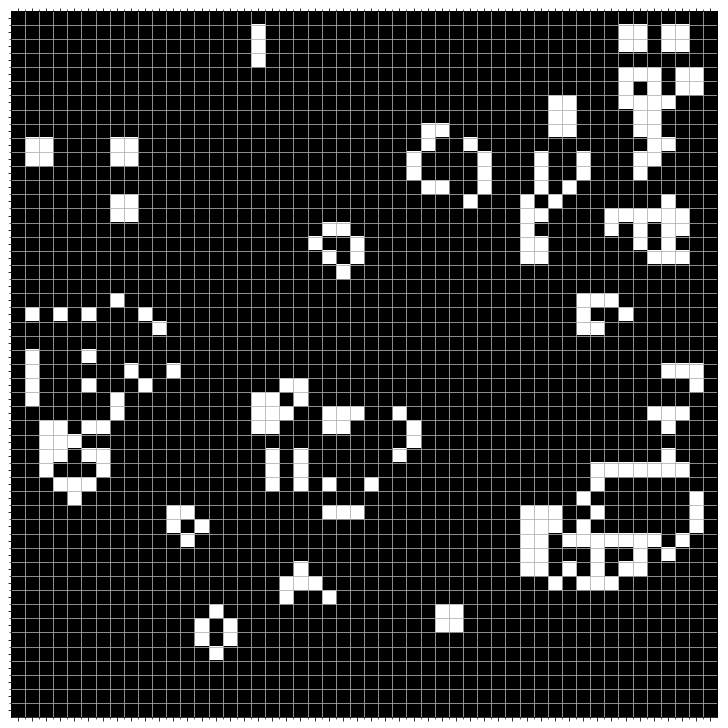

In [7]:
n = 50
figure = "Random"

#Gráfica de *cada* Matriz o generación
fig = plt.figure(figsize=(13,13))  
ax = plt.axes()
im = ax.matshow(initial_condition_2D(figure, n),cmap=plt.cm.gray) #
plt.xticks([i for i in range(n)]) #xticks: Para cambiar los ejes y poder considerarlos todos
plt.yticks([i for i in range(n)])
graph_2D()
    
#Animacion: Observar el cambio entre las matrices 
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=60, blit=True) 
HTML(anim.to_html5_video())

El juego de la vida ha atraído la atención de físicos, biólogos, economistas, matemáticos y filósofos debido a las formas sorprendentes en cómo los patrones pueden evolucionar. Por ejemplo desde su creación se han encontrado un gran número de patrones que se clasifican como: **_estáticos, oscilantes y planeadores o spaceships_** (aquellos que se desplazan a través del tablero). 

Otras formas más complejas serían: 
  - **Guns (pistolas):** Objetos estáticos que generan planeadores.
  - **Puffers (fumadores o locomotoras):** Se mueven mientras dejan un rastro de escombros detrás.
  - **Rakes (Rastrillos):** es una especie de puffer, pero en este caso los escombros son una corriente de spaceships.
  - **Breeders (Criadores):** patrón con crecimiento cuadrático al generar múltiples copias de un patrón secundario, cada uno de los cuales genera múltiples copias de un patrón terciario.



---
### Blinker: 
**Tipo:** Oscilador
    - Periodo: 2
    - Descubierto por Jhon Conway en 1970

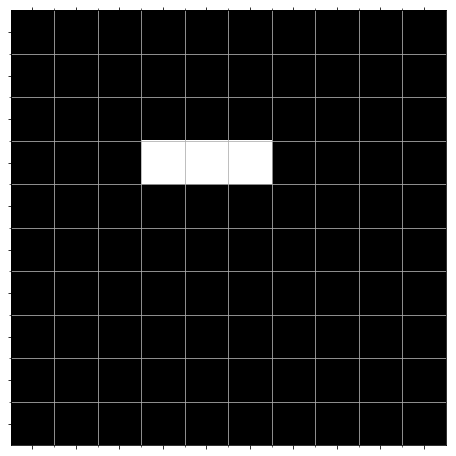

In [7]:
n = 10
figure = "Blinker"

#Gráfica de cada Matriz o generación
fig = plt.figure(figsize=(8,8))  
ax = plt.axes()
im = ax.matshow(initial_condition_2D(figure, n),cmap=plt.cm.gray) #
plt.xticks([i for i in range(n)]) #Para cambiar los ejes y considerarlos todos
plt.yticks([i for i in range(n)])

graph_2D()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=2, blit=True)
HTML(anim.to_html5_video())

---
### Puffer Fish (Pez globo)
**Tipo:** Puffer - Locomotora
    - Periodo: 12
    - Descubierto por Richard Schank en 2014

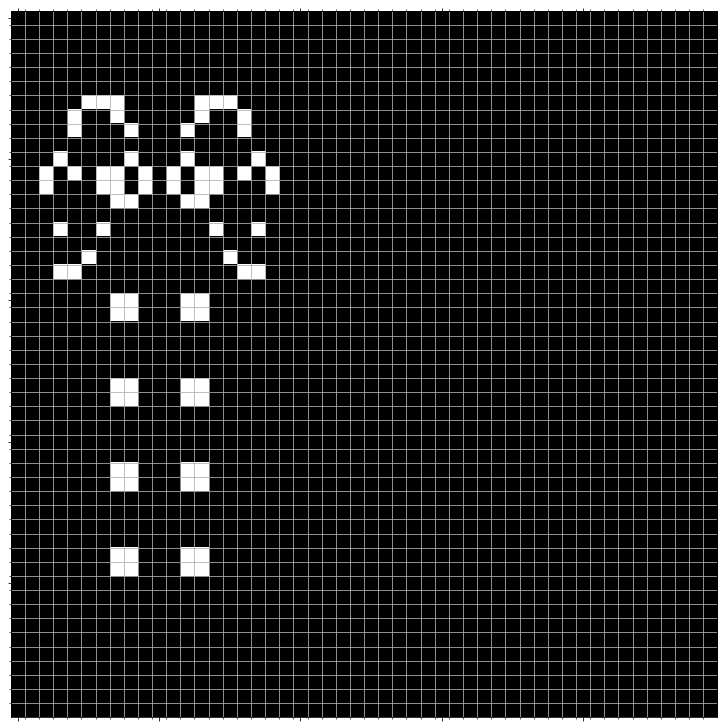

In [9]:
n = 50
figure = "PufferFish"

#Gráfica de cada Matriz o generación
fig = plt.figure(figsize=(13,13))  
ax = plt.axes()
im = ax.matshow(initial_condition_2D(figure, n),cmap=plt.cm.gray) #
plt.xticks([i for i in range(n)]) #Para cambiar los ejes y considerarlos todos
plt.yticks([i for i in range(n)])
graph_2D()

im = ax.matshow(initial_condition_2D(figure, n),cmap=plt.cm.gray)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=45, blit=True)     
HTML(anim.to_html5_video())

---

### R - Pentomino
**Tipo:** Matusalén: Es un patrón que requiere un gran número de generaciones para estabilizarse (conocido como su vida útil) y se vuelve mucho más grande que su configuración inicial en algún momento de su evolución. 
    - Vida útil: 1103 generaciones
    - Descubierto por Jhon Conway en 1970

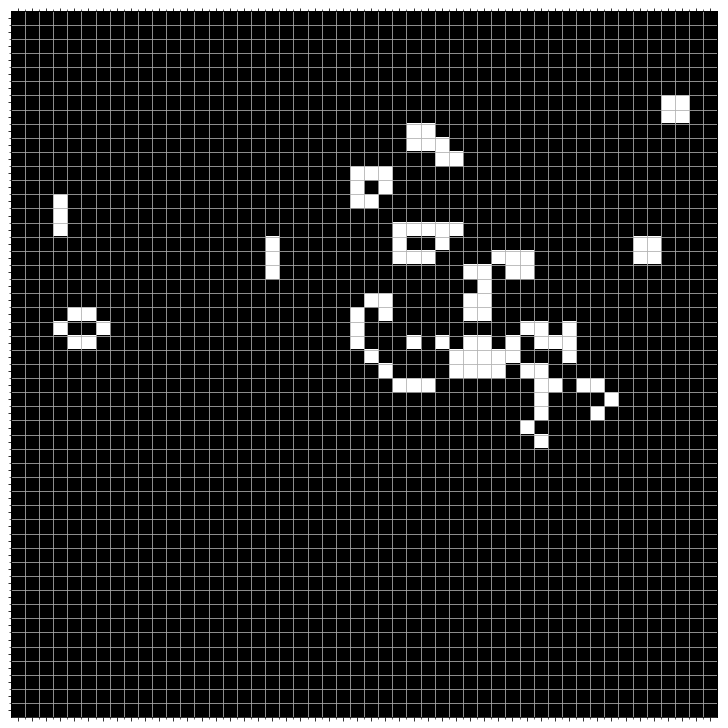

In [17]:
n = 50
figure = "R_Pentomino"

#Gráfica de cada Matriz o generación
fig = plt.figure(figsize=(13,13))  
ax = plt.axes()
im = ax.matshow(initial_condition_2D(figure, n),cmap=plt.cm.gray) #
plt.xticks([i for i in range(n)]) #Para cambiar los ejes y considerarlos todos
plt.yticks([i for i in range(n)])
graph_2D()

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, blit=True)     
HTML(anim.to_html5_video())

---
### Middleweight Spaceship:

**Tipo:** Spaceship o Nave espacial
    - Periodo: 4
    - Descubierto por Jhon Conway en 1970

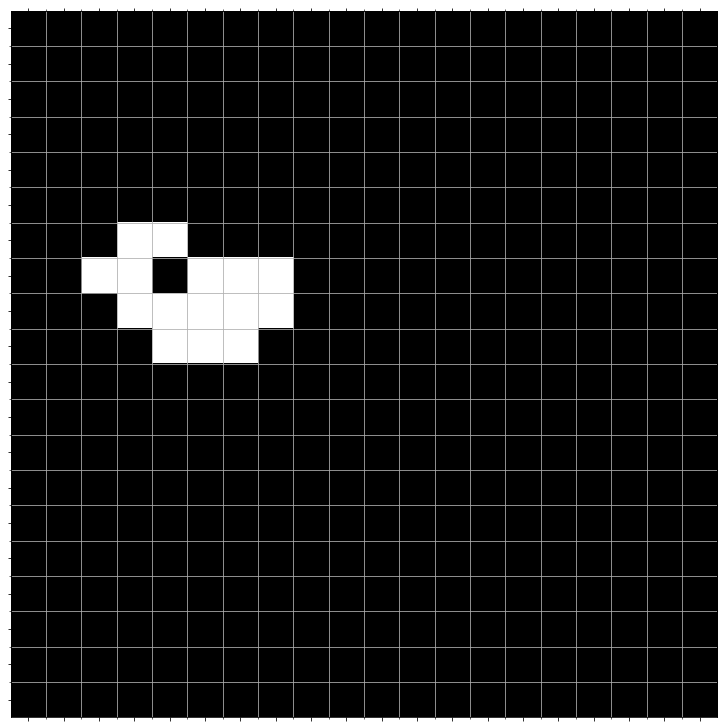

In [18]:
n = 20 
figure = "Middleweight_Spaceshipboard"

#Gráfica de cada Matriz o generación
fig = plt.figure(figsize=(13,13))  
ax = plt.axes()
im = ax.matshow(initial_condition_2D(figure, n),cmap=plt.cm.gray) #
plt.xticks([i for i in range(n)]) #Para cambiar los ejes y considerarlos todos
plt.yticks([i for i in range(n)])
graph_2D()

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, blit=True)     
HTML(anim.to_html5_video())

---
### Gosper glider gun (Pistola de Planeadores):
    - Periodo: 30
    - Descubierto por Bill Gosper en 1970

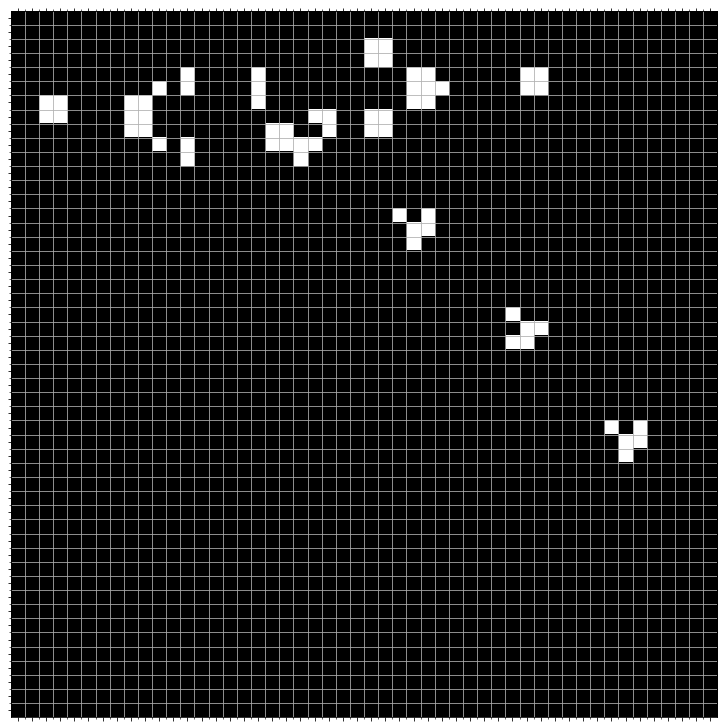

In [19]:
n = 50 
figure = "Gosper_glider_gun"

#Gráfica de cada Matriz o generación
fig = plt.figure(figsize=(13,13))  
ax = plt.axes()
im = ax.matshow(initial_condition_2D(figure, n),cmap=plt.cm.gray) #
plt.xticks([i for i in range(n)]) #Para cambiar los ejes y considerarlos todos
plt.yticks([i for i in range(n)])
graph_2D()

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, blit=True)     
HTML(anim.to_html5_video())

---

## Preguntas Fundamentales

El juego ha servido como analogía para explicar de que de alguna forma, la  noción de complejidad y organización pueden emerger espontáneamente sin necesidad de un diseñador. Por otro lado, _Stephen Hawking_ en su libro, **El gran diseño**, hace una reflexión interesante:

La Física fundamental o las leyes que rigen el _Universo_ de Conway solo hablan de células en dos estados: vivas o muertas. Pero a mayores escalas, surgen los patrones básicos mecionados: **interminentes, bloques y naves espaciales**. A escalas todavía mayores aparecen muchos otros patrones más complejos como, **las pistolas de planeadores, Corderships** (que es cualquier nave espacial que se basa en motores de conmutación),**los trepadores** (es una reacción en la cual dos objetos colisionan, dejando a uno de los objetos movido hacia atrás y el otro hacia delante), etc. 

_Experimento mental:_ Supongamos que se tiene un juego de la vida de grandes dimensiones y se le entrega a una persona con el reto de que explique las leyes que lo rigen. Con el tiempo, la persona podrá concluir que existen distintos organismos que pueden ser clasificados según su comportamiento, podrá hablar, por ejemplo, de organismos intermitentes, de aquellos que parecen inertes y no se mueven con el tiempo, organismos constructores o depredadores. Podrá describir cómo se desplazan cada uno de ellos y la forma en que interactúan o incluso, concluir las leyes sobre lo que ocurre cuando dos objetos chocan.

Se podría elaborar toda una física a cualquier nivel de objetos compuestos, en cuyas leyes aparecen _conceptos y entidades que no existen_ en las leyes originales. El desplazamiento, los choques, las interacciones y comportamientos solo son una _ilusión_, al igual que los supuestos organismos macroscópicos. Todo depende del modelo.

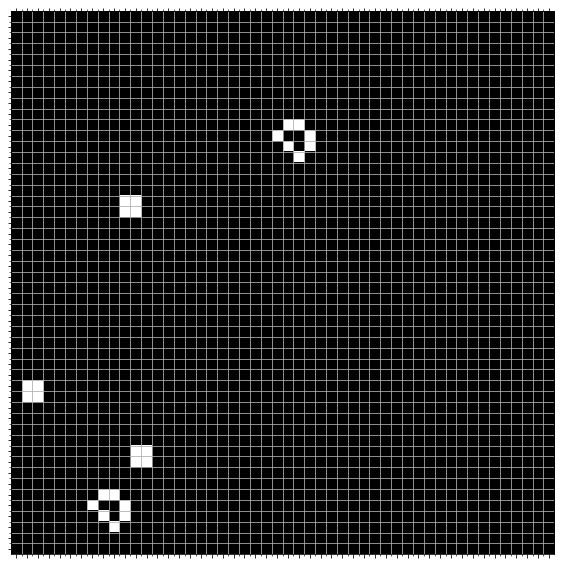

In [20]:
n = 50 
figure = "Life3"

#Gráfica de cada Matriz o generación
fig = plt.figure(figsize=(10,10))  
ax = plt.axes()
im = ax.matshow(initial_condition_2D(figure, n),cmap=plt.cm.gray) 
plt.xticks([i for i in range(n)]) #Para cambiar los ejes y considerarlos todos
plt.yticks([i for i in range(n)])
graph_2D()

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, blit=True)  
HTML(anim.to_html5_video())

## ¿Vida inteligente?

Conway y su equipo demostró que los enormes conglomerados de cuadros que se autorreplican son _**Máquinas de Turin Universales**_: un patrón que es capaz de realizar cálculos completos. Es decir, si le "suministramos" a la máquina un _input_ (el ambiente adecuado en el juego de la vida), después de algunas generaciones el patrón se podría leer como el _Output_ del cálculo. Estos patrones autorreplicantes necesitan aproximadamente, según los trabajos de _Jhon Von Newmann_, es de $10^{12}$ cuadros, el cual es el número de moléculas en una célula humana.

### ¿Vivimos en una simulación?
El problema de los bordes: Resultan paradojas con las células cercanas a los bordes puesto que no es posible evaluar el tablero infinitamente, por lo tanto, las leyes se "rompen" en dichos espacios.

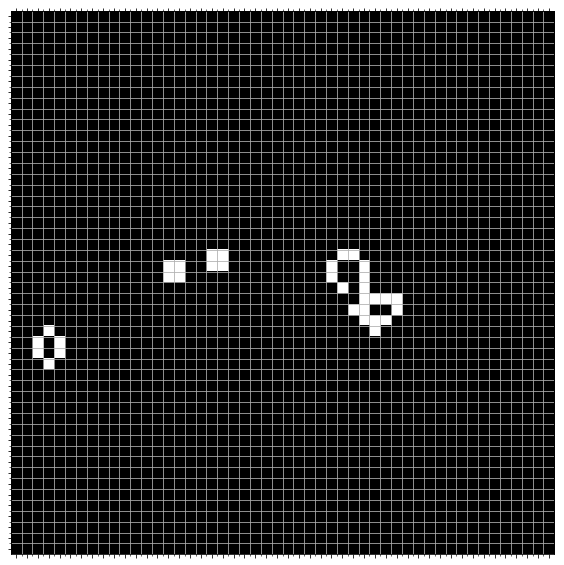

In [21]:
n = 50 
figure = "Life2"

#Gráfica de cada Matriz o generación
fig = plt.figure(figsize=(10,10))  
ax = plt.axes()
im = ax.matshow(initial_condition_2D(figure, n),cmap=plt.cm.gray) 
plt.xticks([i for i in range(n)]) #Para cambiar los ejes y considerarlos todos
plt.yticks([i for i in range(n)])
graph_2D()

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, blit=True)  
HTML(anim.to_html5_video())


### Referencias
- Gardner, Martin. MATHEMATICAL GAMES: The fantastic combinations of John Conway's new solitaire game "life". Scientific American 223 (October 1970): 120-123.
- Conway's Game of Life.  Life Wiki [internet]: http://conwaylife.com/wiki/Game_of_life
- Cellular Automaton. Wolfram Math World [internet]: http://mathworld.wolfram.com/CellularAutomaton.html
- Hawking, Stephen; Mlodinow, Leonard. El gran Diseño (2010).

- https://github.com/sduquemesa/fundComputacion
- https://niginsblog.wordpress.com/2016/03/07/new-spaceship-speed-in-conways-game-of-life/
- https://datasciencelab.wordpress.com/tag/matplotlib/
- http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb